In [1]:
from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
from mrcnn.utils import Dataset
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
import pdb
import numpy as np
import skimage
from numpy import expand_dims
from numpy import mean
from mrcnn.utils import compute_ap
from mrcnn.model import load_image_gt
from mrcnn.model import mold_image

Using TensorFlow backend.


In [2]:
class PredictionConfig(Config):
    # define the name of the configuration
    NAME = "weed_cfg"
    # number of classes (background + weed + crop)
    NUM_CLASSES = 1 + 2
    # simplify GPU config
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
# create config
cfg = PredictionConfig()
# define the model
model = MaskRCNN(mode='inference', model_dir='./', config=cfg)
# load model weights
model_path = 'mask_rcnn_weed_cfg_0004.h5'
model.load_weights(model_path, by_name=True)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.








(684, 685, 2)
[2 2]
[257 387 279 421]
[179 247 194 268]


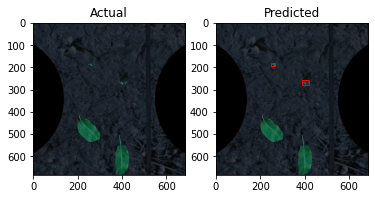

In [3]:
import cv2
from matplotlib import pyplot
from matplotlib.patches import Rectangle
image = cv2.imread('exp 3.jpg')
def plot(image):
    scaled_image = mold_image(image, cfg)
    # convert image into one sample
    sample = expand_dims(scaled_image, 0)
    # make prediction
    yhat = model.detect(sample, verbose=0)[0]
    pyplot.subplot(1, 2, 1)
    pyplot.imshow(image)
    pyplot.title('Actual')
    pyplot.subplot(1, 2, 2)
    pyplot.imshow(image)
    pyplot.title('Predicted')
    ax = pyplot.gca()
    print(yhat['masks'].shape)
    print(yhat['class_ids'])
    # plot each box
    for box in yhat['rois']:
        # get coordinates
        print(box)
        y1, x1, y2, x2 = box
        # calculate width and height of the box
        width, height = x2 - x1, y2 - y1
        # create the shape
        rect = Rectangle((x1, y1), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
    pyplot.show()
plot(image)